In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_aisles = pd.read_csv('aisles.csv')
df_aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [3]:
df_departments = pd.read_csv('departments.csv')
df_departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [4]:
df_order_products_prior= pd.read_csv('order_products__prior.csv')
df_order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [5]:
df_order_products_train = pd.read_csv('order_products__train.csv')
df_order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [6]:
df_orders = pd.read_csv('orders.csv')
df_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [7]:
df_products = pd.read_csv('products.csv')
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
df_sample_submission = pd.read_csv('sample_submission.csv')
df_sample_submission.head()

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


In [9]:
df_orders.eval_set.value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

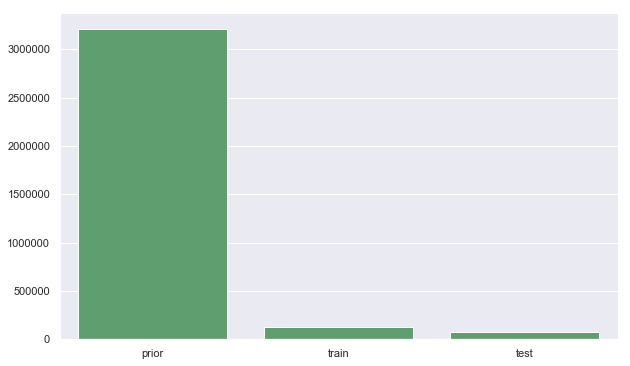

In [10]:
data = df_orders.eval_set.value_counts()
plt.figure(figsize = (10,6))

#data.plot.bar(x  = data.index,color = ['g'],alpha =0.8)

sns.set()
sns.barplot(x = data.index,y = data.values,color = 'g')
plt.show()

In [11]:
data = df_orders.groupby('user_id').count().groupby('order_number').count()

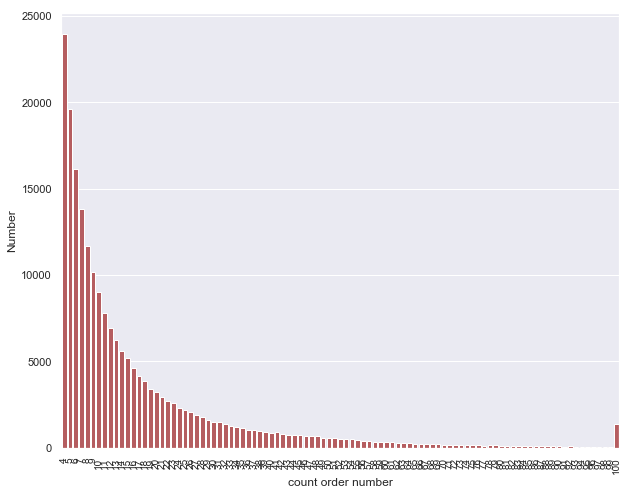

In [12]:
plt.figure(figsize= (10,8))
sns.barplot(x = data.index ,y = data.order_id,color = 'r')
plt.xticks(rotation = 'vertical',fontsize = 10)
plt.xlabel('count order number')
plt.ylabel('Number')
plt.show()

In [13]:
df_orders.groupby('order_dow')['order_id'].count()

order_dow
0    600905
1    587478
2    467260
3    436972
4    426339
5    453368
6    448761
Name: order_id, dtype: int64

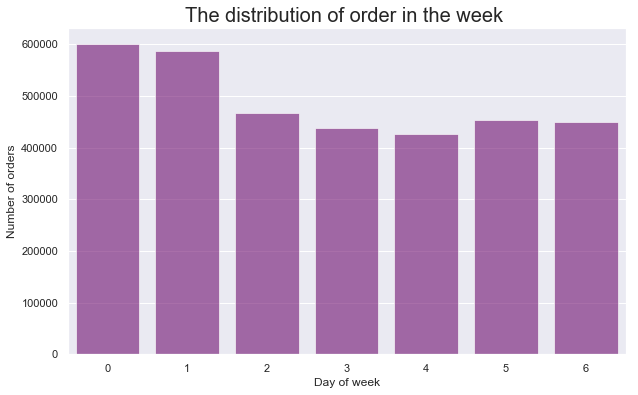

In [14]:
data = df_orders.groupby('order_dow')['order_id'].count()

plt.figure(figsize= (10,6))
sns.barplot(x = data.index, y= data.values,color = 'purple',alpha = 0.6)
plt.xlabel('Day of week')
plt.ylabel('Number of orders')
plt.title('The distribution of order in the week ',fontsize = 20)
plt.show()

In [15]:
df_orders.groupby('order_hour_of_day')['order_number'].count()

order_hour_of_day
0      22758
1      12398
2       7539
3       5474
4       5527
5       9569
6      30529
7      91868
8     178201
9     257812
10    288418
11    284728
12    272841
13    277999
14    283042
15    283639
16    272553
17    228795
18    182912
19    140569
20    104292
21     78109
22     61468
23     40043
Name: order_number, dtype: int64

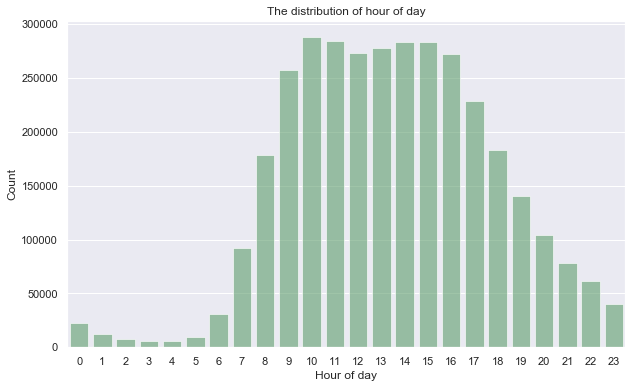

In [16]:
data = df_orders.groupby('order_hour_of_day')['order_number'].count()

plt.figure(figsize = (10,6))
sns.barplot(x = data.index,y = data.values,color = 'g',alpha = 0.6)
plt.xlabel('Hour of day')
plt.ylabel('Count')
plt.title('The distribution of hour of day')

plt.show()

In [17]:
data=df_orders.groupby(['order_dow','order_hour_of_day']).count().reset_index()
data = data.pivot('order_dow','order_hour_of_day','order_id')
data

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645
5,3189,1672,1016,841,910,1574,4866,13434,24015,34232,...,37407,37508,35860,29955,24310,18741,13322,9515,7498,5265
6,3306,1919,1214,863,802,1136,3243,11319,22960,30839,...,38748,38093,35562,30398,24157,18346,13392,10501,8532,6087


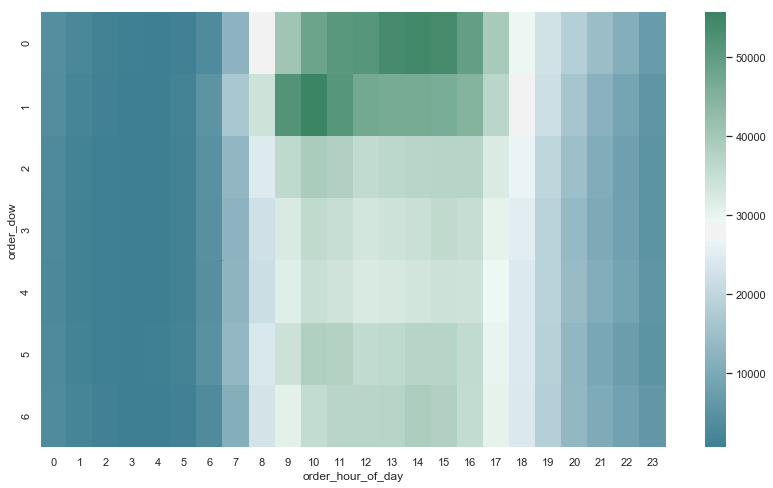

In [18]:
plt.figure(figsize=(14,8))
color = sns.diverging_palette(220, 150, as_cmap = True)
sns.heatmap(data,cmap = color)

In [19]:
data = df_orders.groupby('days_since_prior_order')['order_id'].count()

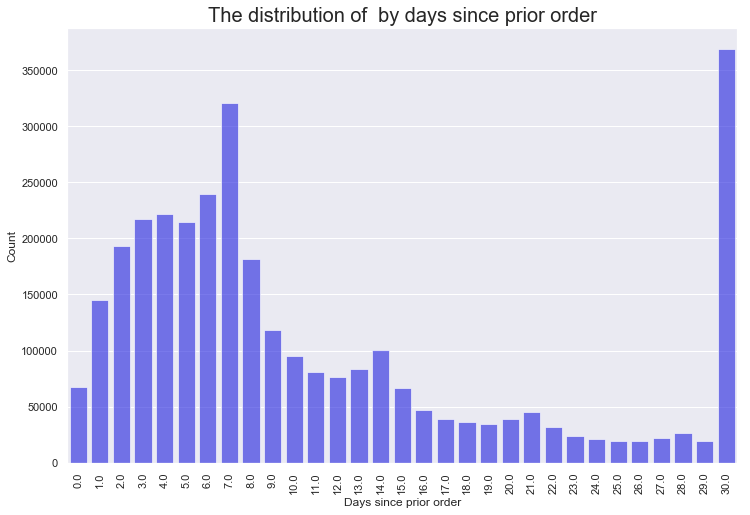

In [20]:
plt.figure(figsize = (12,8))

sns.barplot(x = data.index,y = data.values,color = 'blue',alpha = 0.6)
plt.xlabel('Days since prior order')
plt.xticks(rotation = 'vertical')
plt.ylabel('Count')
plt.title('The distribution of  by days since prior order',fontsize = 20)
plt.show()

In [21]:
df_order_products_prior['reordered'].value_counts()/df_order_products_prior.shape[0]

1    0.589697
0    0.410303
Name: reordered, dtype: float64

In [22]:
df_order_products_train['reordered'].value_counts()/df_order_products_train.shape[0]

1    0.598594
0    0.401406
Name: reordered, dtype: float64

In [23]:
data = df_order_products_train.groupby('order_id').count().reset_index().groupby('product_id').count()
data[:10]

,order_id,add_to_cart_order,reordered
product_id,,,
1,6845,6845,6845
2,7368,7368,7368
3,8033,8033,8033
4,8218,8218,8218
5,8895,8895,8895
6,8708,8708,8708
7,8541,8541,8541
8,7983,7983,7983
9,7217,7217,7217


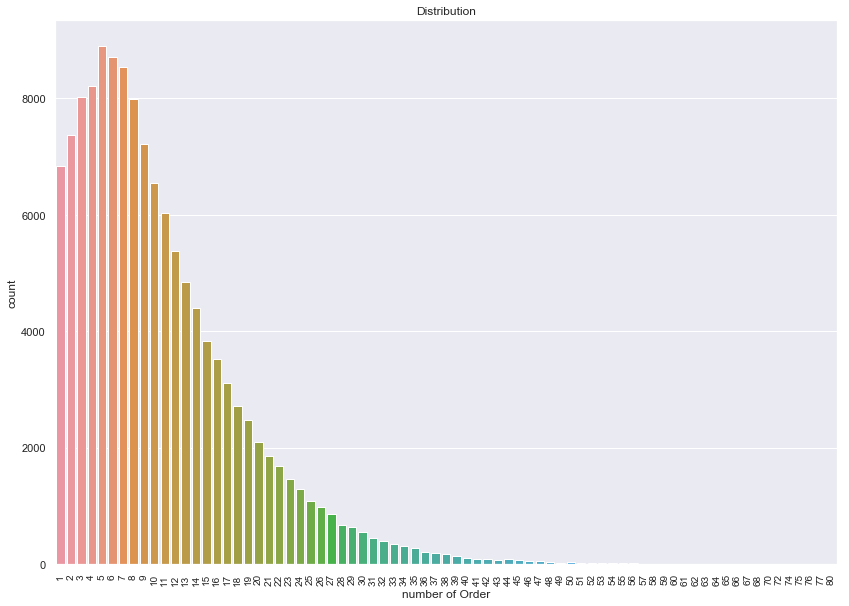

In [24]:
plt.figure(figsize = (14,10))

sns.barplot(x = data.index,y = data.order_id)
plt.xticks(rotation = 'vertical',fontsize = 10)
plt.xlabel('number of Order')
plt.ylabel('count')
plt.title('Distribution')

plt.show()

In [25]:
df_order_products_prior = pd.merge(df_order_products_prior,df_products,how = 'left',on = 'product_id')
df_order_products_prior = pd.merge(df_order_products_prior,df_aisles,how = 'left',on = 'aisle_id')
df_order_products_prior = pd.merge(df_order_products_prior,df_departments,how = 'left',on = 'department_id')

print(df_order_products_prior.shape)

(32434489, 9)


In [26]:
df_order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [27]:
data = df_order_products_prior['product_name'].value_counts().reset_index().head(20)
data.columns = ['product_name','Count']
data

,product_name,Count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


In [28]:
data = df_order_products_prior['aisle'].value_counts().head(20)
data

fresh fruits                     3642188
fresh vegetables                 3418021
packaged vegetables fruits       1765313
yogurt                           1452343
packaged cheese                   979763
milk                              891015
water seltzer sparkling water     841533
chips pretzels                    722470
soy lactosefree                   638253
bread                             584834
refrigerated                      575881
frozen produce                    522654
ice cream ice                     498425
crackers                          458838
energy granola bars               456386
eggs                              452134
lunch meat                        395130
frozen meals                      390299
baby food formula                 382456
fresh herbs                       377741
Name: aisle, dtype: int64

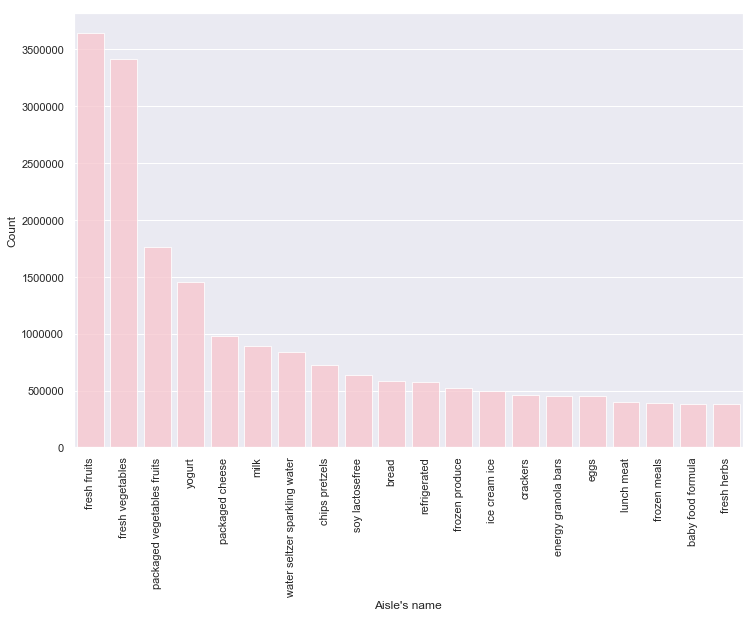

In [29]:
fig,ax = plt.subplots(figsize = (12,8))
sns.barplot(x = data.index,y = data.values,ax = ax,color = 'pink',alpha = 0.8)

plt.xticks(rotation = 'vertical')
plt.xlabel("Aisle's name")
plt.ylabel('Count')

plt.show()

In [30]:
data = df_order_products_prior['department'].value_counts()
data

produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2690129
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           709569
meat seafood        708931
personal care       447123
babies              423802
international       269253
alcohol             153696
pets                 97724
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

In [31]:
data.index.tolist()

['produce',
 'dairy eggs',
 'snacks',
 'beverages',
 'frozen',
 'pantry',
 'bakery',
 'canned goods',
 'deli',
 'dry goods pasta',
 'household',
 'breakfast',
 'meat seafood',
 'personal care',
 'babies',
 'international',
 'alcohol',
 'pets',
 'missing',
 'other',
 'bulk']

In [32]:
explode = [0]*len(data)
explode[0] = 0.1
explode

[0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

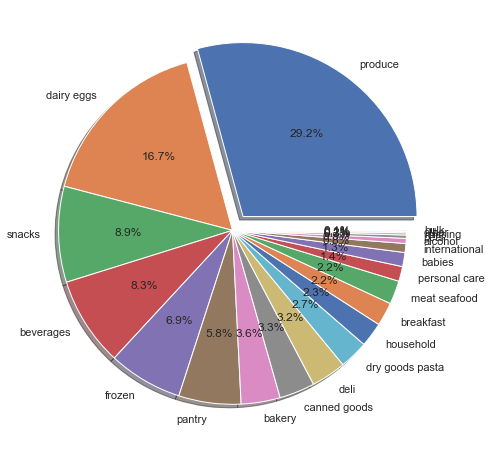

In [33]:
plt.figure(figsize=(14,8))
ax = plt.pie(data,labels = data.index.tolist(),autopct = '%.1f%%',shadow = True,explode = explode)

In [34]:
df_order_products_prior.groupby('department')['reordered'].mean()

department
alcohol            0.569924
babies             0.578971
bakery             0.628141
beverages          0.653460
breakfast          0.560922
bulk               0.577040
canned goods       0.457405
dairy eggs         0.669969
deli               0.607719
dry goods pasta    0.461076
frozen             0.541885
household          0.402178
international      0.369229
meat seafood       0.567674
missing            0.395849
other              0.407980
pantry             0.346721
personal care      0.321129
pets               0.601285
produce            0.649913
snacks             0.574180
Name: reordered, dtype: float64

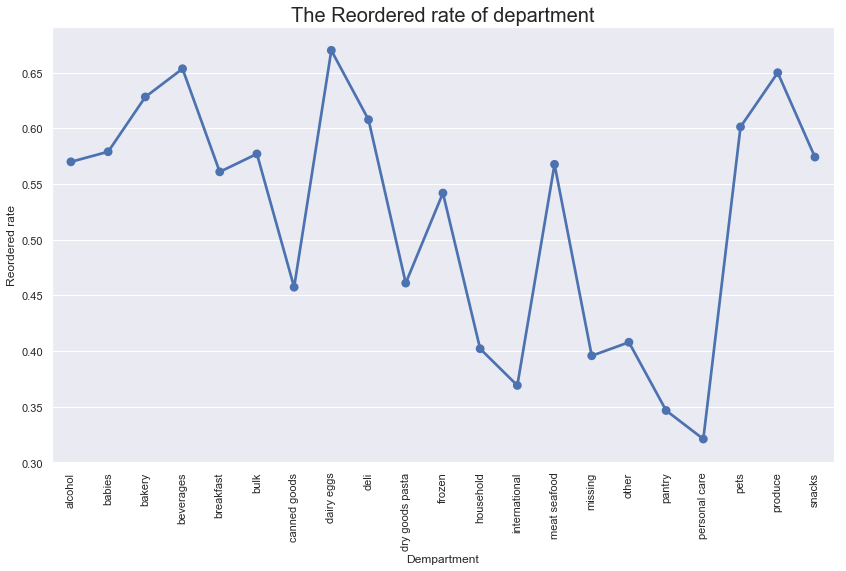

In [35]:
data = df_order_products_prior.groupby('department')['reordered'].mean()

fig,axis = plt.subplots(figsize = (14,8))
sns.pointplot(ax = axis,x = data.index,y = data.values)
plt.xticks(rotation = 'vertical')
plt.xlabel('Dempartment')
plt.ylabel('Reordered rate')
plt.title('The Reordered rate of department',fontsize = 20)
plt.show()

In [36]:
data = df_order_products_prior.groupby(['department_id','aisle'])['reordered'].mean().reset_index()
data.head()

,department_id,aisle,reordered
0,1,frozen appetizers sides,0.525557
1,1,frozen breads doughs,0.539992
2,1,frozen breakfast,0.626221
3,1,frozen dessert,0.420777
4,1,frozen juice,0.450855


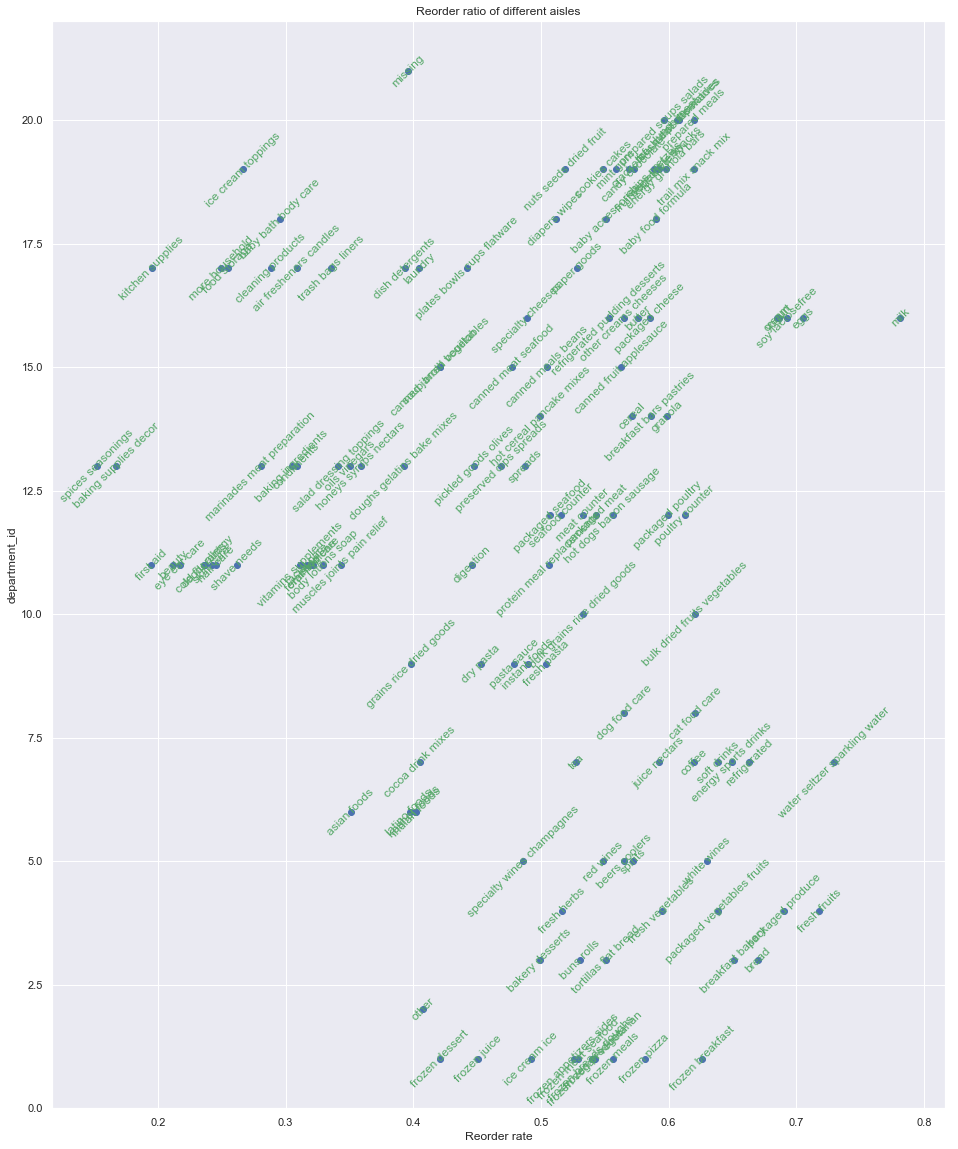

In [37]:
fig,ax = plt.subplots(figsize = (16,20))

ax.scatter(x = 'reordered',y = 'department_id',data = data)
for i,txt in enumerate(data.aisle.values):
    ax.annotate(txt,(data.reordered.values[i],data.department_id.values[i]),
               rotation = 45,ha = 'center',va = 'center',color = 'g')
plt.xlabel('Reorder rate')
plt.ylabel('department_id')
plt.title('Reorder ratio of different aisles')

plt.show()

In [38]:
df_order_products_prior['add_to_cart_order_code'] = df_order_products_prior['add_to_cart_order'].copy()
df_order_products_prior['add_to_cart_order_code'][df_order_products_prior['add_to_cart_order']>70] = 70

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
data = df_order_products_prior.groupby('add_to_cart_order_code')['reordered'].mean()
data.head()

add_to_cart_order_code
1    0.677533
2    0.676251
3    0.658037
4    0.636958
5    0.617383
Name: reordered, dtype: float64

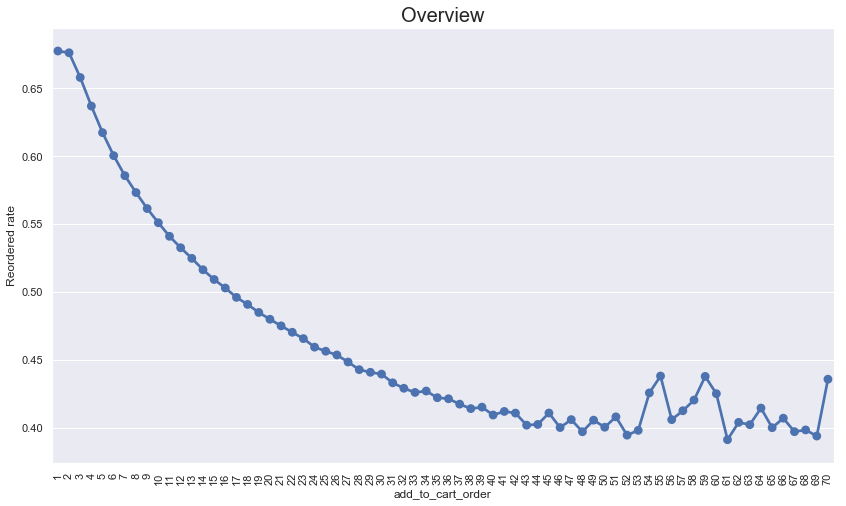

In [40]:
plt.figure(figsize = (14,8))

sns.pointplot(x = data.index, y = data.values)
plt.xlabel('add_to_cart_order')
plt.xticks(rotation = 'vertical')
plt.ylabel('Reordered rate')
plt.title('Overview',fontsize = 20)

plt.show()

In [41]:
df_order_products_prior = pd.merge(df_order_products_train,df_orders,on = 'order_id',how = 'left')

In [42]:
data = df_order_products_prior.groupby('order_dow')['reordered'].mean()
data

order_dow
0    0.609624
1    0.598977
2    0.588365
3    0.586724
4    0.594632
5    0.606178
6    0.594238
Name: reordered, dtype: float64

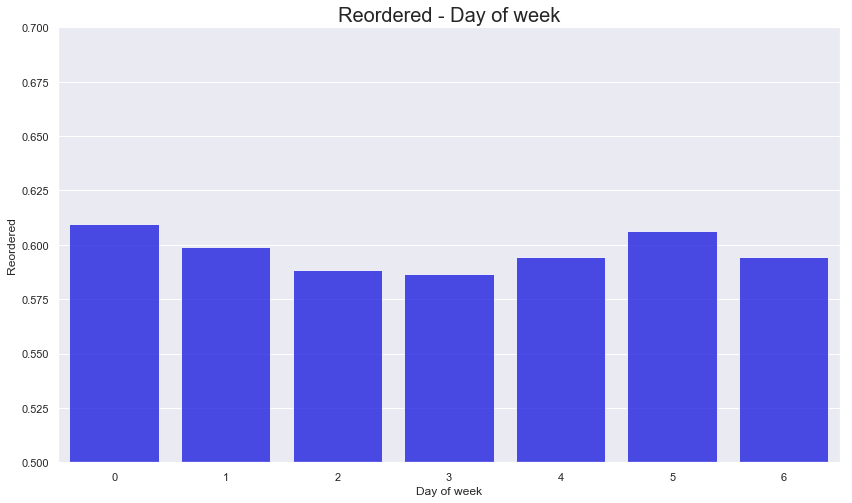

In [43]:
plt.figure(figsize = (14,8))

sns.barplot(x = data.index,y = data.values,color = 'blue',alpha = 0.8)

plt.xlabel('Day of week')
plt.ylabel('Reordered')
plt.ylim(0.5,0.7)
plt.title('Reordered - Day of week',fontsize = 20)

plt.show()

In [49]:
data = df_order_products_prior.groupby('order_hour_of_day')['reordered'].mean()
data.head()

order_hour_of_day
0    0.571177
1    0.579453
2    0.579665
3    0.581624
4    0.598108
Name: reordered, dtype: float64

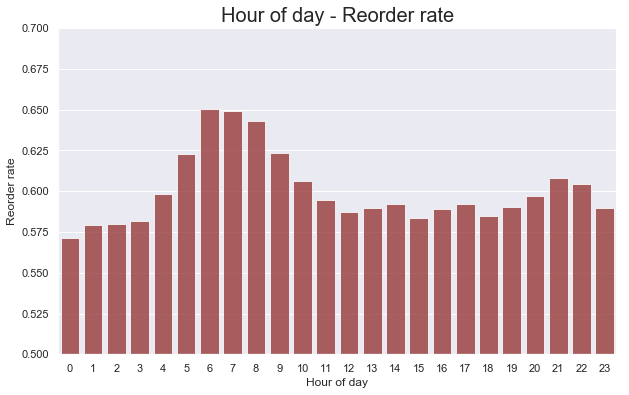

In [56]:
plt.figure(figsize = (10,6))

sns.barplot(x = data.index,y = data.values,color = 'brown',alpha = 0.8)
plt.xlabel('Hour of day')
plt.ylabel('Reorder rate')
plt.title('Hour of day - Reorder rate',fontsize = 20)
plt.ylim(0.5,0.7)

plt.show()

In [61]:
data = df_order_products_prior.groupby(['order_dow','order_hour_of_day'])['reordered'].mean().reset_index()
data = data.pivot('order_dow','order_hour_of_day','reordered')
data

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,0.577806,0.587189,0.593341,0.553435,0.599455,0.607201,0.653686,0.677985,0.665738,0.635068,...,0.598129,0.591321,0.601673,0.614780,0.587774,0.609967,0.622931,0.641041,0.624711,0.605878
1,0.622407,0.550877,0.511111,0.664921,0.626016,0.597846,0.664765,0.656859,0.654519,0.642871,...,0.598679,0.570853,0.576848,0.572953,0.573926,0.603978,0.546328,0.602629,0.574086,0.586061
2,0.589645,0.621521,0.596045,0.567485,0.637427,0.629555,0.630402,0.639769,0.623237,0.604619,...,0.584259,0.586026,0.566976,0.577985,0.572924,0.588681,0.591452,0.575623,0.593591,0.567022
3,0.610324,0.507788,0.615730,0.553797,0.469101,0.638132,0.672999,0.624746,0.633493,0.621520,...,0.583432,0.572695,0.567665,0.570108,0.586399,0.560852,0.589400,0.579552,0.570420,0.573351
4,0.530852,0.575233,0.540659,0.593985,0.617761,0.666062,0.683973,0.635435,0.631235,0.592284,...,0.591776,0.593674,0.588828,0.606985,0.589294,0.594579,0.587502,0.609812,0.592511,0.591469
5,0.524818,0.582648,0.518617,0.562005,0.631579,0.610675,0.615789,0.639612,0.638711,0.631389,...,0.604482,0.596998,0.618176,0.596956,0.587063,0.589160,0.621550,0.588651,0.603620,0.593590
6,0.548270,0.613260,0.645455,0.619266,0.607629,0.614907,0.632563,0.657087,0.632832,0.615684,...,0.577603,0.569084,0.589777,0.592307,0.593773,0.577114,0.604114,0.618027,0.643312,0.594640


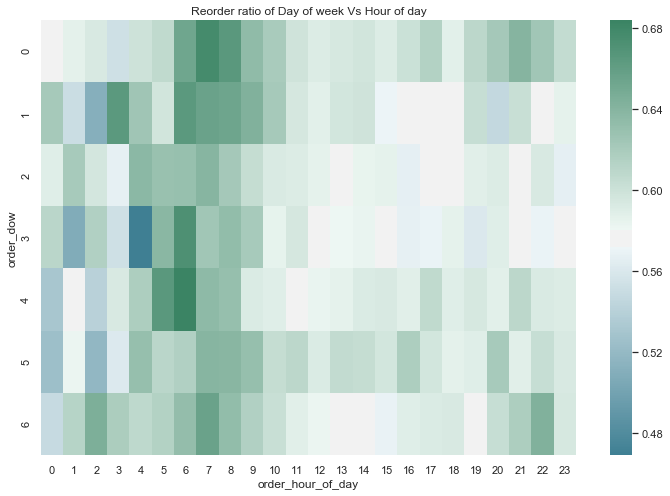

In [65]:
fig,axis = plt.subplots(figsize=(12,8))
sns.heatmap(data,cmap = color)
plt.title("Reorder ratio of Day of week Vs Hour of day")
plt.show()

In [57]:
df_order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,112108,train,4,4,10,9.0
1,1,11109,2,1,112108,train,4,4,10,9.0
2,1,10246,3,0,112108,train,4,4,10,9.0
3,1,49683,4,0,112108,train,4,4,10,9.0
4,1,43633,5,1,112108,train,4,4,10,9.0
